In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df1 = pd.read_csv('../input/innomatics-music-recom/kaggle_visible_evaluation_triplets.txt',
                         sep='\t', names=['user_id', 'song_id', 'freq'])

In [7]:
df1.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [8]:
df1.describe(include='all')

,user_id,song_id,freq
count,1450933,1450933,1.450933e+06
unique,110000,163206,NaN
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0,NaN
freq,53,5043,NaN
mean,NaN,NaN,3.187149e+00
std,NaN,NaN,7.051664e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,1.000000e+00
50%,NaN,NaN,1.000000e+00
75%,NaN,NaN,3.000000e+00


In [9]:
unique_tracks = pd.read_csv('../input/innomatics-music-recom/unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [10]:
unique_tracks.head()

,track_id,song_id,artist_name,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [11]:
unique_tracks.describe(include='all')

,track_id,song_id,artist_name,song
count,1000000,1000000,1000000,999985
unique,1000000,999056,72665,702000
top,TRVPFQS128F423CB1D,SOKUAGP12A8C133B94,Michael Jackson,Intro
freq,1,3,194,1511


In [12]:
df1.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [13]:
unique_tracks.isnull().sum()

track_id        0
song_id         0
artist_name     0
song           15
dtype: int64

In [14]:
unique_tracks['song'] = unique_tracks['song'].fillna(unique_tracks['song'].mode()[0])

In [15]:
unique_tracks['song_id'].duplicated().sum()

944

In [16]:
#unique_tracks['song_id'] = unique_tracks.drop_duplicates(subset='song_id')

In [17]:
#unique_tracks.isnull().sum()

In [18]:
#unique_tracks['song_id'] = unique_tracks['song_id'].replace(np.nan,'Others',inplace=True)
#unique_tracks.head()

In [19]:
df1.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [20]:
combined = df1.merge(unique_tracks,on='song_id')

In [21]:
combined.head()

,user_id,song_id,freq,track_id,artist_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [22]:
combined.dtypes

user_id        object
song_id        object
freq            int64
track_id       object
artist_name    object
song           object
dtype: object

In [23]:
combined.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
song           0
dtype: int64

In [24]:
combined['song_id'].duplicated().sum()

1328746

In [25]:
#df3 = pd.merge(df1, unique_tracks, on=['song_id'], how='inner')

In [26]:
#df3['song_id'].duplicated().sum()

In [27]:
print("Total number of data points:",combined.shape[0])
print("Total number of users:",combined['user_id'].unique().shape[0])
print("Total number of songs:",combined['song_id'].unique().shape[0])
print("Total number of tracks:",combined['track_id'].unique().shape[0])
print("Total number of artists:",combined['artist_name'].unique().shape[0])

Total number of data points: 1491952
Total number of users: 110000
Total number of songs: 163206
Total number of tracks: 163828
Total number of artists: 28367


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='freq', ylabel='Density'>

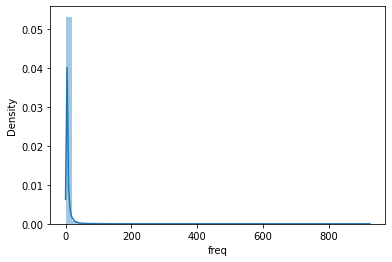

In [28]:
sns.distplot(combined['freq'])

# Number Of Songs Listened Per User

In [29]:
songs_per_user = combined.groupby('user_id')['song_id'].count()
songs_per_user

user_id
00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                            ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee    13
Name: song_id, Length: 110000, dtype: int64

In [30]:
songs_per_user.sort_values().head()

user_id
b4f681dac463c297568bffe7f4b646b74a5e6d0d    5
1691b9058739f0b88ac2777e5bbffe0e1d400f2d    5
d1764e1f4626164793d400b95efb4a5f80a06cf9    5
d1776bb80cf8298288974c52f903cc3b9601761a    5
98d00906e235bede8d2b14b9cf5b802ee2438231    5
Name: song_id, dtype: int64

In [31]:
songs_per_user.describe()

count    110000.000000
mean         13.563200
std           8.321648
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: song_id, dtype: float64

<AxesSubplot:xlabel='song_id', ylabel='Density'>

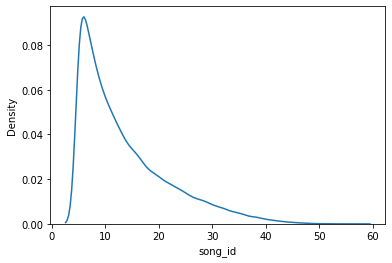

In [32]:
sns.kdeplot(songs_per_user)

## **Popular Artist**

In [33]:
popular_artist = combined.groupby('artist_name')['track_id'].count()
popular_artist

artist_name
!!!                     109
!Deladap                  3
& And Oceans              2
'68 Comeback             22
'N Sync/Phil Collins     48
                       ... 
Étienne Daho             45
Íon                       5
Ólafur Arnalds           78
Órla Fallon               1
Özlem Tekin               1
Name: track_id, Length: 28367, dtype: int64

In [34]:
highest_popularity_artist=popular_artist.sort_values(ascending=False).head()

In [35]:
highest_popularity_artist

artist_name
Coldplay                  13675
Kings Of Leon             11586
Justin Bieber              9259
Florence + The Machine     8213
Eminem                     8160
Name: track_id, dtype: int64

<AxesSubplot:xlabel='track_id', ylabel='Density'>

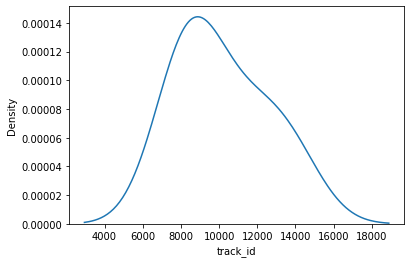

In [36]:
sns.kdeplot(highest_popularity_artist)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_id', ylabel='Density'>

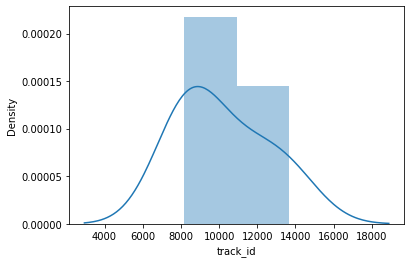

In [37]:
sns.distplot(highest_popularity_artist)

## Most Popular Songs

In [38]:
song_popularity = combined.groupby('song')['song_id'].count()
song_popularity

song

Ef Ég Hefði Aldrei...                                        1

Light Mass Prayers                                           4

The Arsonist Story":  Evil Craves Attention/Our Son/10x10    1

Ég Átti Gráa Æsku                                            4
 (Jack The Stripper)                                          2
                                                             ..
Þú ert jörðin                                                 2
Þú ert sólin                                                  2
ça Me Fait Du Bien                                            2
étienne d'août                                                4
þetta Gerist á Bestu Bæjum                                    1
Name: song_id, Length: 137670, dtype: int64

In [39]:
highest_song_popularity=song_popularity.sort_values(ascending=False).head()
highest_song_popularity

song
Sehr kosmisch                     5043
Undo                              4483
You're The One                    4270
Use Somebody                      3822
Dog Days Are Over (Radio Edit)    3780
Name: song_id, dtype: int64

<AxesSubplot:xlabel='song_id', ylabel='Density'>

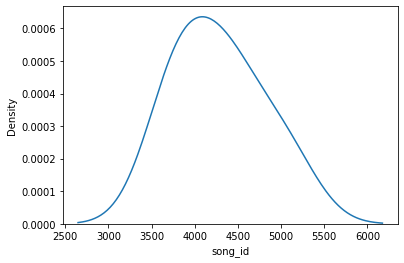

In [40]:
sns.kdeplot(highest_song_popularity)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='song_id', ylabel='Density'>

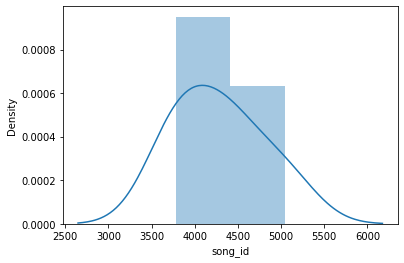

In [41]:
sns.distplot(highest_song_popularity)

## Most Popular Track Listened per User

In [42]:
track_per_user = combined.groupby('track_id')['user_id'].count()
track_per_user

track_id
TRAAAAK128F9318786     6
TRAAABD128F429CF47     1
TRAAAED128E0783FAB     2
TRAAAGR128F425B14B     2
TRAAAHJ128F931194C    11
                      ..
TRZZZOW128F4248475     1
TRZZZRJ128F42819AF    13
TRZZZUM128F424188C     1
TRZZZYR128F92F0796    32
TRZZZYS128F92E3FD1     5
Name: user_id, Length: 163828, dtype: int64

In [43]:
track_per_user.sort_values(ascending=False).head()

track_id
TRDMBIJ128F4290431    5043
TRGXQES128F42BA5EB    4483
TRAEHHJ12903CF492F    4136
TRHKJNX12903CEFCDF    3780
TRONYHY128F92C9D11    3672
Name: user_id, dtype: int64

<AxesSubplot:xlabel='user_id', ylabel='Density'>

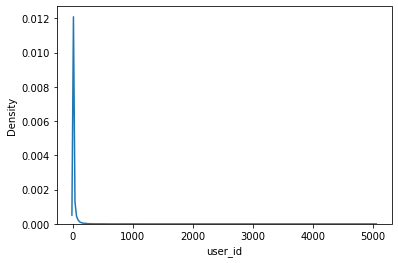

In [44]:
sns.kdeplot(track_per_user)

## Most played Song

## Most Played Artist

In [45]:
artist = combined.groupby('artist_name')['user_id'].count()
artist

artist_name
!!!                     109
!Deladap                  3
& And Oceans              2
'68 Comeback             22
'N Sync/Phil Collins     48
                       ... 
Étienne Daho             45
Íon                       5
Ólafur Arnalds           78
Órla Fallon               1
Özlem Tekin               1
Name: user_id, Length: 28367, dtype: int64

In [46]:
most_played_artist = combined.groupby('artist_name')['user_id'].count().reset_index(name='ratings')
most_played_artist['song'] = combined['song']
most_played_artist

,artist_name,ratings,song
0,!!!,109,You're The One
1,!Deladap,3,You're The One
2,& And Oceans,2,You're The One
3,'68 Comeback,22,You're The One
4,'N Sync/Phil Collins,48,You're The One
...,...,...,...
28362,Étienne Daho,45,Undo
28363,Íon,5,Undo
28364,Ólafur Arnalds,78,Undo
28365,Órla Fallon,1,Undo


In [47]:
song_popular = combined.groupby('song')['song_id'].count().reset_index(name='rat')
song_popular.head()

,song,rat
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [48]:
combined.head()

,user_id,song_id,freq,track_id,artist_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [49]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

In [50]:
most_played_artist['song_id'] = combined['song_id']
most_played_artist['user_id'] = combined['user_id']

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat = ['user_id','song_id']
for i in cat:
    most_played_artist[i] = le.fit_transform(most_played_artist[i])

In [52]:
data = Dataset.load_from_df(most_played_artist[['user_id','song_id','ratings']],reader)

In [53]:
from surprise import KNNBasic
algo=SVD()

In [54]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [55]:
results = cross_validate(
    algo = algo, data = data, measures=['RMSE'], 
    cv=5
    )

In [56]:
most_played_artist.head(50)

,artist_name,ratings,song,song_id,user_id
0,!!!,109,You're The One,8,20930
1,!Deladap,3,You're The One,8,16154
2,& And Oceans,2,You're The One,8,16293
3,'68 Comeback,22,You're The One,8,18823
4,'N Sync/Phil Collins,48,You're The One,8,15441
5,'Til Tuesday,27,You're The One,8,20388
6,'t Hof Van Commerce,16,You're The One,8,18745
7,'t Hof Van Commerce & Brahim,2,You're The One,8,71
8,(Hed) Planet Earth,3,You're The One,8,18086
9,(hed) p.e.,22,You're The One,8,16994


In [61]:
uid = 16154
iid = 8

In [60]:
most_played_artist[most_played_artist['artist_name'] == '!Deladap']

,artist_name,ratings,song,song_id,user_id
1,!Deladap,3,You're The One,8,16154


In [62]:
pred = algo.predict(uid, iid, r_ui=3, verbose=True)

user: 16154      item: 8          r_ui = 3.00   est = 5.00   {'was_impossible': False}


In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
uid = 9308  # raw user id (as in the ratings file). They are **strings**!
iid = 2

In [ ]:
most_played_artist[most_played_artist['artist_name'] == '113 Feat. Molaré']

In [ ]:
pred = algo.predict(995, 5, r_ui=1, verbose=True)